In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
t=pd.read_csv('train_label.csv',header=None)
x=pd.read_csv('test_label.csv',header=None)
df['totalbookings']=t[0]
test['totalbookings']=x[0]

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [5]:
#Missing value check
df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
totalbookings    0
dtype: int64

In [6]:
df['datetime']=pd.to_datetime(df['datetime'])
test['datetime']=pd.to_datetime(test['datetime'])

visualising data

In [7]:
#visualising data
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

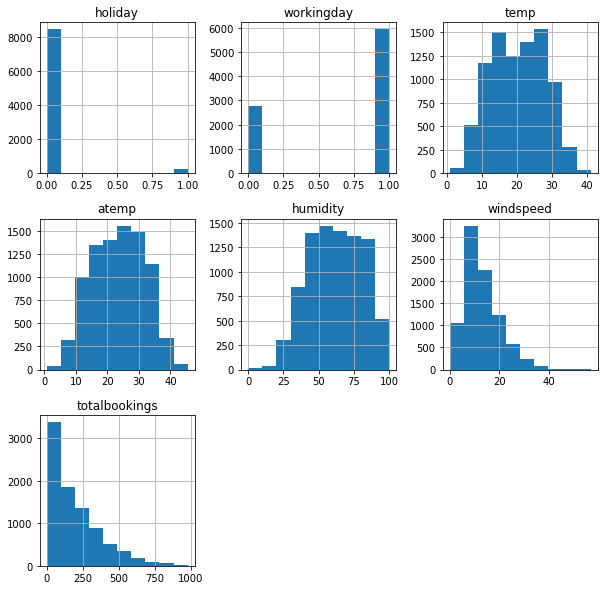

In [8]:
df.hist(figsize=(10,10))
plt.show()

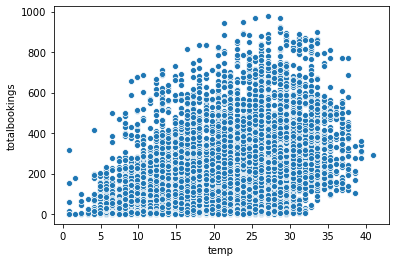

In [13]:
sns.scatterplot(x=df['temp'], y=df['totalbookings'])

In [9]:
#we can see that windspeed and total bookings have some outliers
df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,totalbookings
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


<AxesSubplot:>

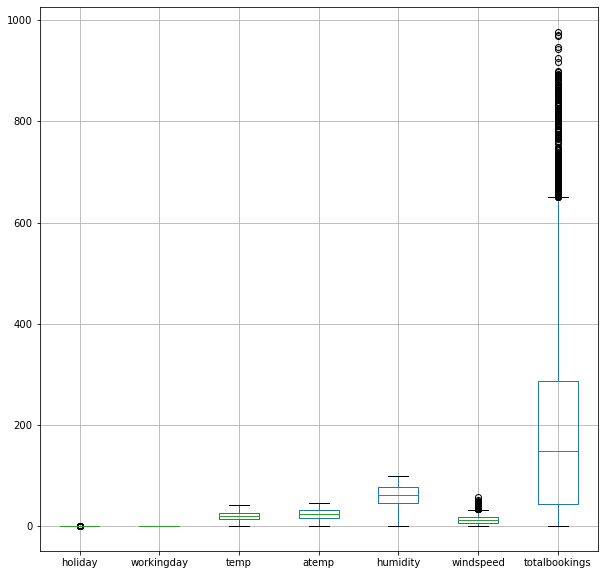

In [10]:
df.boxplot(figsize=(10,10))

<AxesSubplot:xlabel='windspeed'>

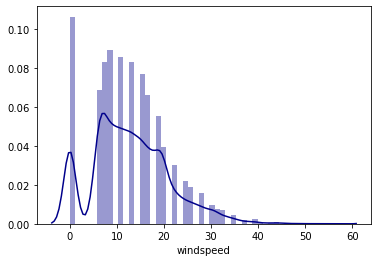

In [11]:
sns.distplot(df['windspeed'], hist=True, kde=True, color = 'darkblue')

<AxesSubplot:xlabel='totalbookings'>

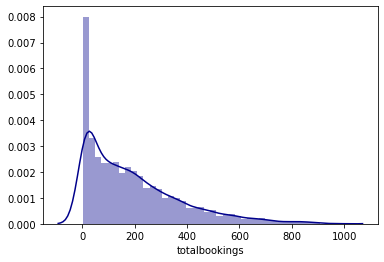

In [12]:
sns.distplot(df['totalbookings'], hist=True, kde=True, color = 'darkblue')

Removing outliers

In [8]:
percentiles = df['windspeed'].quantile([0.01,0.98]).values #Filtering 1%(0-1), 1%(99-100) extreme outlier data
df['windspeed'] = np.clip(df['windspeed'], percentiles[0], percentiles[1])
percentiles = df['totalbookings'].quantile([0.01,0.97]).values #Filtering 1%(0-1), 1%(99-100) extreme outlier data
df['totalbookings'] = np.clip(df['totalbookings'], percentiles[0], percentiles[1])

<AxesSubplot:xlabel='windspeed'>

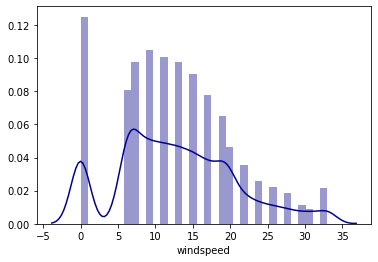

In [9]:
sns.distplot(df['windspeed'], hist=True, kde=True, color = 'darkblue')

<AxesSubplot:xlabel='totalbookings'>

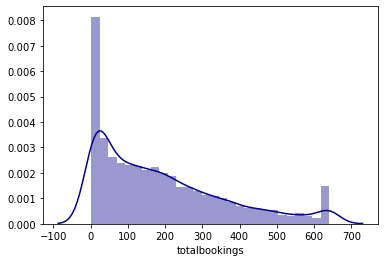

In [11]:
sns.distplot(df['totalbookings'], hist=True, kde=True, color = 'darkblue')

In [10]:
df1_corr=df.corr()['totalbookings']
df1_corr

holiday         -0.001810
workingday       0.003395
temp             0.402604
atemp            0.398079
humidity        -0.314163
windspeed        0.099398
totalbookings    1.000000
Name: totalbookings, dtype: float64

Feature Engineering

In [11]:
df['Month']=df['datetime'].dt.month
df['weekday']=df['datetime'].dt.weekday
df['year']=df['datetime'].dt.year
df['Hour']=df['datetime'].dt.hour
test['Month']=test['datetime'].dt.month
test['weekday']=test['datetime'].dt.weekday
test['year']=test['datetime'].dt.year
test['Hour']=test['datetime'].dt.hour
print(df.shape)
print(test.shape)

(8708, 14)
(2178, 14)


In [12]:
df=df.drop('datetime',axis=1)
test=test.drop('datetime',axis=1)

In [13]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbookings,Month,weekday,year,Hour
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5,2,2012,19
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9,2,2012,4
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1,3,2011,9
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11,4,2011,16
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9,1,2011,13


In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [15]:
df['season'] = labelencoder.fit_transform(df['season'])
df['weather'] = labelencoder.fit_transform(df['weather'])

In [16]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbookings,Month,weekday,year,Hour
0,2,0,1,0,22.14,25.760,77,16.9979,504,5,2,2012,19
1,0,0,1,0,28.70,33.335,79,19.0012,5,9,2,2012,4
2,1,0,1,0,5.74,6.060,50,22.0028,139,1,3,2011,9
3,3,0,1,0,13.94,16.665,29,8.9981,209,11,4,2011,16
4,0,0,1,0,30.34,33.335,51,19.0012,184,9,1,2011,13


In [17]:
test['season'] = labelencoder.fit_transform(test['season'])
test['weather'] = labelencoder.fit_transform(test['weather'])

In [18]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbookings,Month,weekday,year,Hour
0,2,0,1,0,21.32,25.000,48,35.0008,256,5,3,2012,11
1,2,0,0,0,23.78,27.275,64,7.0015,87,6,5,2012,7
2,1,0,0,1,11.48,12.120,100,27.9993,11,3,6,2011,20
3,3,0,1,2,25.42,28.790,83,0.0000,84,10,3,2011,11
4,2,0,0,0,25.42,31.060,43,23.9994,668,6,5,2012,12


Coverting contious variables into ordinal


In [19]:
df['tempband'] = pd.qcut(df['temp'], 4)
print(df[['tempband', 'totalbookings']].groupby(['tempband'], as_index=False).mean().sort_values(by='tempband', ascending=True))

         tempband  totalbookings
0  (0.819, 13.94]     103.286441
1   (13.94, 20.5]     172.408068
2   (20.5, 26.24]     214.115440
3   (26.24, 41.0]     279.394946


In [20]:
combine = [df, test]
for dataset in combine:
    dataset.loc[(dataset['temp'] > 0.819) & (dataset['temp'] <= 13.94), 'temp'] = 0
    dataset.loc[(dataset['temp'] > 13.94) & (dataset['temp'] <= 20.5), 'temp'] = 1
    dataset.loc[(dataset['temp'] > 20.5) & (dataset['temp'] <= 26.24), 'temp']   = 2
    dataset.loc[(dataset['temp'] > 26.24) & (dataset['temp'] <= 41.0), 'temp'] = 3
    dataset['temp'] = dataset['temp'].astype(int)

In [21]:
df['atempband'] = pd.qcut(df['atemp'], 4)
print(df[['atempband', 'totalbookings']].groupby(['atempband'], as_index=False).mean().sort_values(by='atempband', ascending=True))

         atempband  totalbookings
0  (0.759, 16.665]     106.851961
1  (16.665, 24.24]     169.952381
2   (24.24, 31.06]     214.244389
3  (31.06, 45.455]     291.049189


In [22]:
combine = [df, test]
for dataset in combine:
    dataset.loc[(dataset['atemp'] > 0.759) & (dataset['atemp'] <= 16.665), 'atemp'] = 0
    dataset.loc[(dataset['atemp'] > 16.665) & (dataset['atemp'] <= 24.24), 'atemp'] = 1
    dataset.loc[(dataset['atemp'] > 24.24) & (dataset['atemp'] <= 31.06), 'atemp']   = 2
    dataset.loc[(dataset['atemp'] > 31.06) & (dataset['atemp'] <= 45.455), 'atemp'] = 3
    dataset['atemp'] = dataset['atemp'].astype(int)

In [23]:
df['humidityband'] = pd.qcut(df['humidity'], 4)
print(df[['humidityband', 'totalbookings']].groupby(['humidityband'], as_index=False).mean().sort_values(by='humidityband', ascending=True))

     humidityband  totalbookings
0  (-0.001, 46.0]     265.738095
1    (46.0, 61.0]     202.563620
2    (61.0, 77.0]     173.709910
3   (77.0, 100.0]     115.916314


In [24]:
combine = [df, test]
for dataset in combine:
    dataset.loc[(dataset['humidity'] > -0.001) & (dataset['humidity'] <= 46.0), 'humidity'] = 0
    dataset.loc[(dataset['humidity'] > 46.0) & (dataset['humidity'] <= 61.0), 'humidity'] = 1
    dataset.loc[(dataset['humidity'] > 61.0) & (dataset['humidity'] <= 77.0), 'humidity']   = 2
    dataset.loc[(dataset['humidity'] > 77.0) & (dataset['humidity'] <= 100.0), 'humidity'] = 3
    dataset['humidity'] = dataset['humidity'].astype(int)

In [25]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbookings,Month,weekday,year,Hour,tempband,atempband,humidityband
0,2,0,1,0,2,2,2,16.9979,504,5,2,2012,19,"(20.5, 26.24]","(24.24, 31.06]","(61.0, 77.0]"
1,0,0,1,0,3,3,3,19.0012,5,9,2,2012,4,"(26.24, 41.0]","(31.06, 45.455]","(77.0, 100.0]"
2,1,0,1,0,0,0,1,22.0028,139,1,3,2011,9,"(0.819, 13.94]","(0.759, 16.665]","(46.0, 61.0]"
3,3,0,1,0,0,0,0,8.9981,209,11,4,2011,16,"(0.819, 13.94]","(0.759, 16.665]","(-0.001, 46.0]"
4,0,0,1,0,3,3,1,19.0012,184,9,1,2011,13,"(26.24, 41.0]","(31.06, 45.455]","(46.0, 61.0]"


In [26]:
df['wsband'] = pd.qcut(df['windspeed'], 4)
df[['wsband', 'totalbookings']].groupby(['wsband'], as_index=False).mean().sort_values(by='wsband', ascending=True)

,wsband,totalbookings
0,"(-0.001, 7.002]",162.565692
1,"(7.002, 12.998]",190.849395
2,"(12.998, 16.998]",207.812676
3,"(16.998, 32.998]",209.407870


In [27]:
combine = [df, test]
for dataset in combine:
    dataset.loc[(dataset['windspeed'] > -0.001) & (dataset['windspeed'] <= 7.002), 'windspeed'] = 0
    dataset.loc[(dataset['windspeed'] > 7.002) & (dataset['windspeed'] <= 12.998), 'windspeed'] = 1
    dataset.loc[(dataset['windspeed'] > 12.998) & (dataset['windspeed'] <= 16.998), 'windspeed']   = 2
    dataset.loc[(dataset['windspeed'] > 16.998) & (dataset['windspeed'] <= 56.997), 'windspeed'] = 3
    dataset['windspeed'] = dataset['windspeed'].astype(int)

In [28]:
df = df.drop(['tempband','atempband','humidityband','wsband'], axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbookings,Month,weekday,year,Hour
0,2,0,1,0,2,2,2,2,504,5,2,2012,19
1,0,0,1,0,3,3,3,3,5,9,2,2012,4
2,1,0,1,0,0,0,1,3,139,1,3,2011,9
3,3,0,1,0,0,0,0,1,209,11,4,2011,16
4,0,0,1,0,3,3,1,3,184,9,1,2011,13


Train test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y=df.pop('totalbookings')

In [31]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6095, 12)
(2613, 12)
(6095,)
(2613,)


Regression and ensemble models

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score


In [33]:
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.model_selection import GridSearchCV

In [40]:
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("LR-RMSE:",np.sqrt(mse)) 

LR-RMSE: 129.94392265365653


In [53]:
modelRF=RandomForestClassifier()
modelRF.fit(x_train,y_train)
y_predRF=modelRF.predict(x_test)
mseRF = mean_squared_error(y_test, y_predRF)
print('RF-RMSE:',np.sqrt(mseRF))

RF-RMSE: 101.78919294795014


In [94]:
abc = AdaBoostClassifier()
modelAD = abc.fit(x_train, y_train)
y_predAB = modelAD.predict(x_test)
mseAB = mean_squared_error(y_test, y_predAB)
print('Adaboost-RMSE:',np.sqrt(mseAB))

Adaboost-RMSE: 351.8796365335243


In [159]:
modelxgb=xgb.XGBClassifier()
modelxgb.fit(x_train, y_train)
y_predxgb = modelxgb.predict(x_test)
msexgb = mean_squared_error(y_test, y_predxgb)
print("XGB-RMSE:",np.sqrt(msexgb))

XGB-RMSE: 91.34709838978293


As xgb has the best performane,tuning the parameter

In [54]:
#modelxgb=xgb.XGBClassifier()
#parameters = {'n_estimators': [50,100,150,200], 
#             'learning_rate': [0.02,0.1,0.2,0.6], 
#            'max_depth': [5,10,15], 
#            }

In [ ]:
#grid_obj = GridSearchCV(modelxgb, parameters, scoring='neg_root_mean_squared_error')
#grid_obj = grid_obj.fit(x_train, y_train)

In [ ]:
#clf = grid_obj.best_estimator_
#clf.fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#mse = mean_squared_error(y_test, y_pred)
#np.sqrt(mse)

In [192]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.2,
                max_depth = 5, alpha = 5, n_estimators = 400,min_child_weight=3)

In [193]:
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

[12:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [194]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 37.551694


In [88]:
data_dmatrix = xgb.DMatrix(data=df,label=y)

In [163]:
params = {"objective":"reg:linear",'colsample_bytree': 0.7,'learning_rate': 0.2,
                'max_depth': 5, 'alpha': 5,'min_child_weight':5}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=40,metrics="rmse", as_pandas=True, seed=123)

[12:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [164]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,213.542908,0.476463,213.636297,1.230702
1,182.802918,2.289137,182.957494,3.705160
2,159.711034,4.855658,159.870885,5.972668
3,139.592488,3.711100,139.737925,4.810934
4,124.240593,2.847424,124.599953,3.883167


In [165]:
print((cv_results["test-rmse-mean"]).tail(1))

99    41.704386
Name: test-rmse-mean, dtype: float64


In [158]:
xg_reg1 = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[11:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


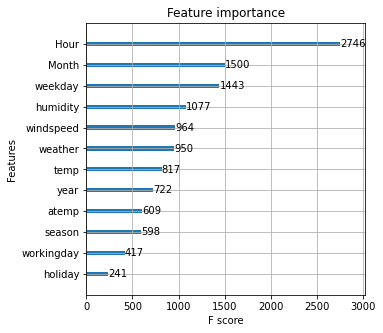

In [159]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

Testing data


In [113]:
#y1=test.pop('totalbookings')


In [118]:
test_dmatrix = xgb.DMatrix(data=test)

In [195]:
y_pred=xg_reg.predict(test)

In [196]:
rmse = np.sqrt(mean_squared_error(y1, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 50.871795
